In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 学習曲線
モデルの汎化性能を検証する方法として交差検証の他に学習曲線がある.学習曲線は訓練データのサイズの関数として訓練データと検証データの性能をプロットしたものである.

In [2]:
df = pd.read_csv("data2.csv")

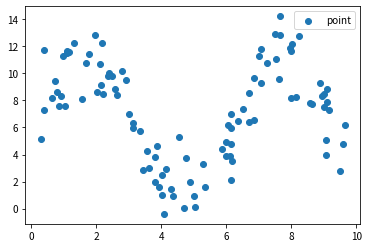

In [3]:
plt.figure(facecolor='white')
plt.scatter(df["x"],df["y"],label='point')
plt.legend()

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [24]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,random_state=0)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    
    plt.figure(facecolor="white")
    plt.plot(np.sqrt(train_errors),"r-+",label="train")
    plt.plot(np.sqrt(val_errors),"b-",label="val")
    plt.ylim(0,100) # 要調整
    plt.legend()
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

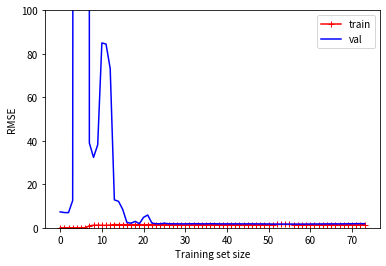

In [25]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

degree=6
X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)
poly_features = PolynomialFeatures(degree=degree,include_bias=False) # インスタンス化
X_poly = poly_features.fit_transform(X) # フォーマットの変換
model = LinearRegression()
plot_learning_curves(model,X_poly,y)

## モデルの汎化誤差の原因
1. バイアス : 前提条件に起因する誤差.例としてデータが2次であるが線形であると考えることがあげられる.バイアスが高いモデルは訓練データに対して過少適合しやすい.
2. 分散 : モデルが訓練データの差異に敏感すぎることで生じる誤差.自由度が高いモデルで分散が高くなりがちであり,訓練データに過学習する.
3. 削減不能誤差 : データのノイズに起因する誤差.データのクリーンアップ(外れ値の検出と除去など)で削減できる可能性がある.